**INTRODUCTION:**

The Wine Quality Dataset contains information about White Wine and Red Wine variants of Vinho Verde, Portugal. Portugal is a top ten wine exporting country which holds 3% of the market share (FAOSTAT, 2019). The Portuguese wine market is dominated by still wines, specifically red wine. (Romo-Muñoz, Monje-Sanhueza, Garrido-Henríquez, & Gil, 2020) Therefore, for our project we will be looking at the quality of red wine and the factors that create balance. 

A higher-quality wine has all of its components balanced, whereas a lower-quality wine has an element that stand out more than the rest. The question we are trying to answer is ****“Can we use the physicochemical properties of red wine to objectively predict whether the quality of a future unknown wine will be bad, satisfactory, or good?”****  We will be using a dataset collected from 1599 samples of the red variant of Vinho Verde. The dataset contains 12 elements: fixed quality, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates, alcohol, and quality. Our output variable is “quality” which the classification model would try to accurately predict. The quality score is measured on a scale from 0 (Bad) to 10 (Good). 

As seen, there is no data regarding the wine brand, grape types, fertilizers/insectides used or retail price due to policy and logistical issues. The original number of observations in each class are imbalanced with much more satisfactory wines than good or bad ones which is fairly understandable. The original research used a regression model to preserve the order of the wine scores and derive distinct accuracy results. 

Our goal is to create an efficient model capable of generating accurate predictions for red wine grown in Vinho Verde which could then be used to improve production efficiency and certification criterias. (Rodrigues et al., 2011)

**REFERENCES:**
Food and Agriculture Organization of the United Nations (FAOSTAT). (2019, October 9). Food and Agriculture Organization Agriculture Trade Domain Statistics. Retrieved from http://faostat.fao.org/site/535/DesktopDefault.aspx?PageID=535

Rodrigo Alejandro Romo-Muñoz, Rodrigo Monje-Sanhueza, Héctor Garrido-Henríquez, José M Gil. (2020) Key market values for bottled wine in an emerging market: product attributes or business strategy?. Applied Economics 52:34, pages 3669-3679.

Rodrigues, S., Otero, M., Alves, A., Coimbra, J., Coimbra, M., Pereira, E., & Duarte, A. (2011, January 18). Elemental analysis for categorization of wines and authentication of their certified brand of origin. Retrieved April 09, 2021, from https://www.sciencedirect.com/science/article/pii/S0889157511000184?casa_token=QhrKN4X-rToAAAAA%3Ann9L8HocNfoGCjcMHTcvbScsF4ZZ2VsT-xTyDHfv5fa--TZ7UMjhgxsANsfKHAwSApCvuTLe0g

In [1]:
## Preliminary Exploratory Data Analysis

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [5]:
#read the dataset in Jupyter
red_wine <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,6


In [6]:
#make quality (originally ranked from 1-10) a categorical variable 
red_wine <- red_wine %>%
    mutate(quality = case_when(quality == "10" ~ "Excellent",
                              quality == "9" ~ "Excellent",
                              quality == "8" ~ "Good",
                              quality == "7" ~ "Good",
                              quality == "6" ~ "Satisfactory",
                              quality == "5" ~ "Satisfactory",
                              quality == "4" ~ "Bad",
                              quality == "3" ~ "Bad",
                              quality == "2" ~ "Poor",
                              quality == "1" ~ "Poor"))

In [31]:
#we will be treating quality as a categorical variable, so we converted into a factor
#we converted the rest of the variables into numerical variables
red_wine <- red_wine %>% 
    mutate(fixed.acidity = as.numeric(fixed.acidity)) %>% 
    mutate(volatile.acidity = as.numeric(volatile.acidity)) %>% 
    mutate(citric.acid = as.numeric(citric.acid)) %>% 
    mutate(residual.sugar = as.numeric(residual.sugar)) %>% 
    mutate(chlorides = as.numeric(chlorides)) %>% 
    mutate(free.sulfur.dioxide = as.numeric(free.sulfur.dioxide)) %>% 
    mutate(total.sulfur.dioxide = as.numeric(total.sulfur.dioxide)) %>% 
    mutate(density = as.numeric(density)) %>% 
    mutate(pH = as.numeric(pH)) %>% 
    mutate(sulphates = as.numeric(sulphates)) %>% 
    mutate(alcohol = as.numeric(alcohol)) %>% 
    mutate(quality = as.factor(quality))

In [32]:
#create a filtered dataset by quality for each classification
#note that red_wine has no inputs for "Excellent" and "Poor"
good_class <- red_wine %>% 
    filter(quality == "Good")
good_class

satisfactory_class <- red_wine %>% 
    filter(quality == "Satisfactory")
satisfactory_class

bad_class <- red_wine %>% 
    filter(quality == "Bad")
bad_class

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,Good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,Good
8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,Good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.4,0.36,0.30,1.8,0.074,17,24,0.99419,3.24,0.70,11.40,Good
7.0,0.56,0.17,1.7,0.065,15,24,0.99514,3.44,0.68,10.55,Good
6.7,0.32,0.44,2.4,0.061,24,34,0.99484,3.29,0.80,11.60,Good


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.59,0.08,4.4,0.086,6,29,0.9974,3.38,0.50,9.0,Bad
5.7,1.13,0.09,1.5,0.172,7,19,0.9940,3.50,0.48,9.8,Bad
8.8,0.61,0.30,2.8,0.088,17,46,0.9976,3.26,0.51,9.3,Bad
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.8,0.91,0.06,2.0,0.060,4,11,0.99592,3.53,0.64,10.90,Bad
6.7,0.76,0.02,1.8,0.078,6,12,0.99600,3.55,0.63,9.95,Bad
6.9,0.48,0.20,1.9,0.082,9,23,0.99585,3.39,0.43,9.05,Bad


In [33]:
#print the number of good, satisfactory, and bad classifications from the dataset
good_class_rows <- nrow(good_class)
print(good_class_rows)

satisfactory_class_rows <- nrow(satisfactory_class)
print(satisfactory_class_rows)

bad_class_rows <- nrow(bad_class)
print(bad_class_rows)

[1] 217
[1] 1319
[1] 63


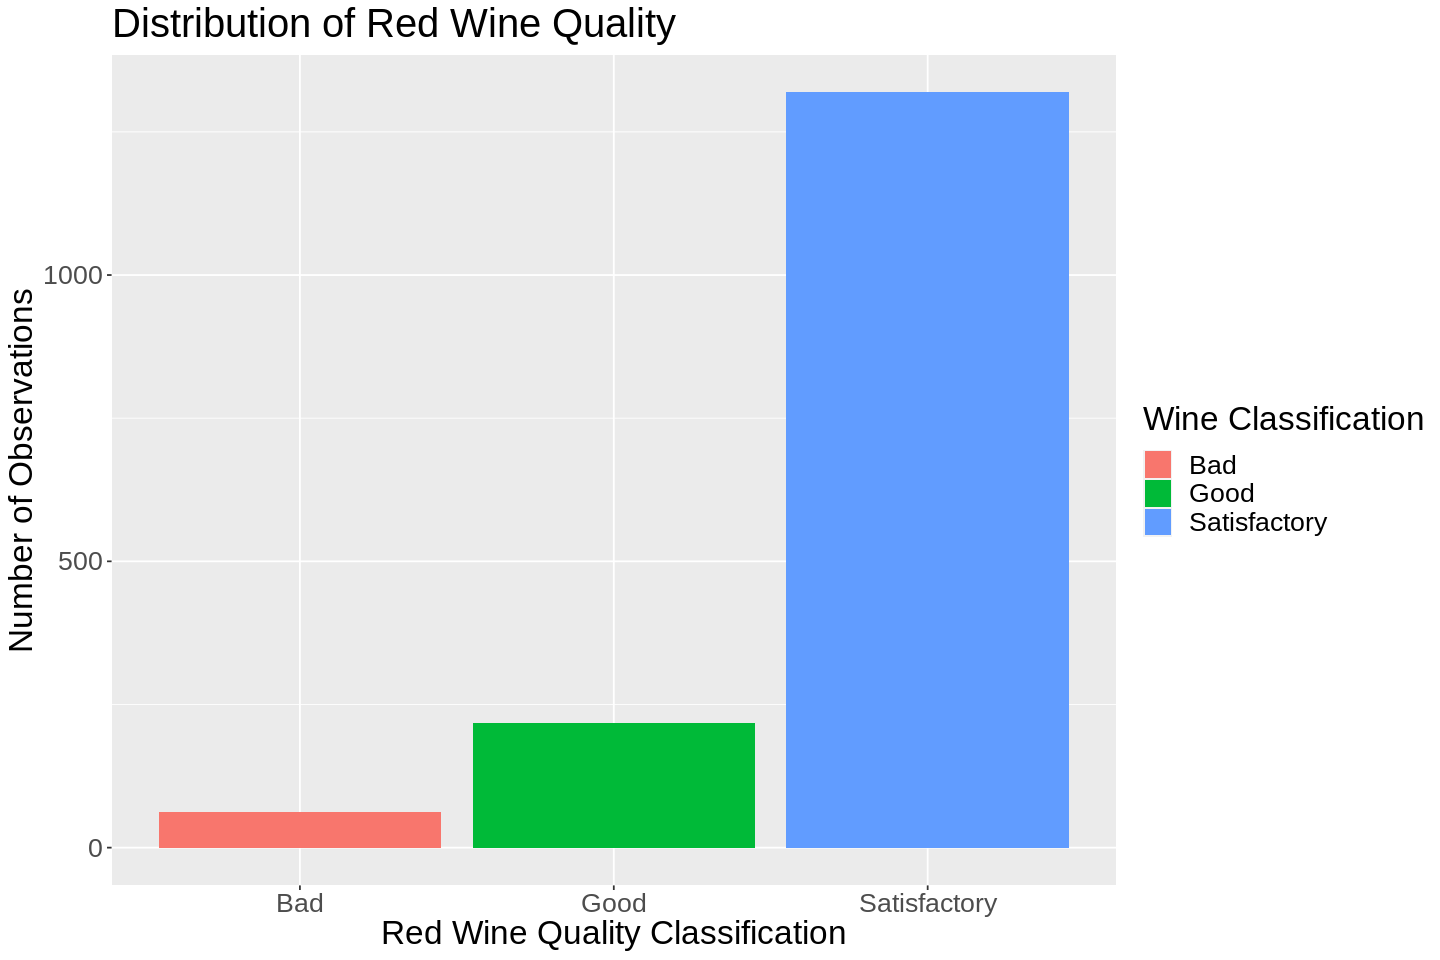

In [34]:
#create a bar graph to compare the amount of observations within each quality classification
options(repr.plot.width = 12, repr.plot.height = 8)
quality_distribution <- red_wine %>% 
    ggplot(aes(x = quality, fill = quality)) +
    geom_bar() +
    labs(x = "Red Wine Quality Classification", y = "Number of Observations", fill = "Wine Classification") +
    ggtitle("Distribution of Red Wine Quality") +
    theme(text = element_text(size = 20))
quality_distribution

In [35]:
## New Added Code

In [36]:
red_wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,Satisfactory
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,Satisfactory
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,Satisfactory
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,Satisfactory
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


In [37]:
na_number<-sum(is.na(red_wine))
na_number

[1] 0

In [38]:
## Cross Validation 

In [39]:
# split the data
set.seed(1234)
red_wine_split <- initial_split(red_wine, prop = 0.75, strata = quality)
red_wine_training <- training(red_wine_split)
red_wine_testing <- testing(red_wine_split)

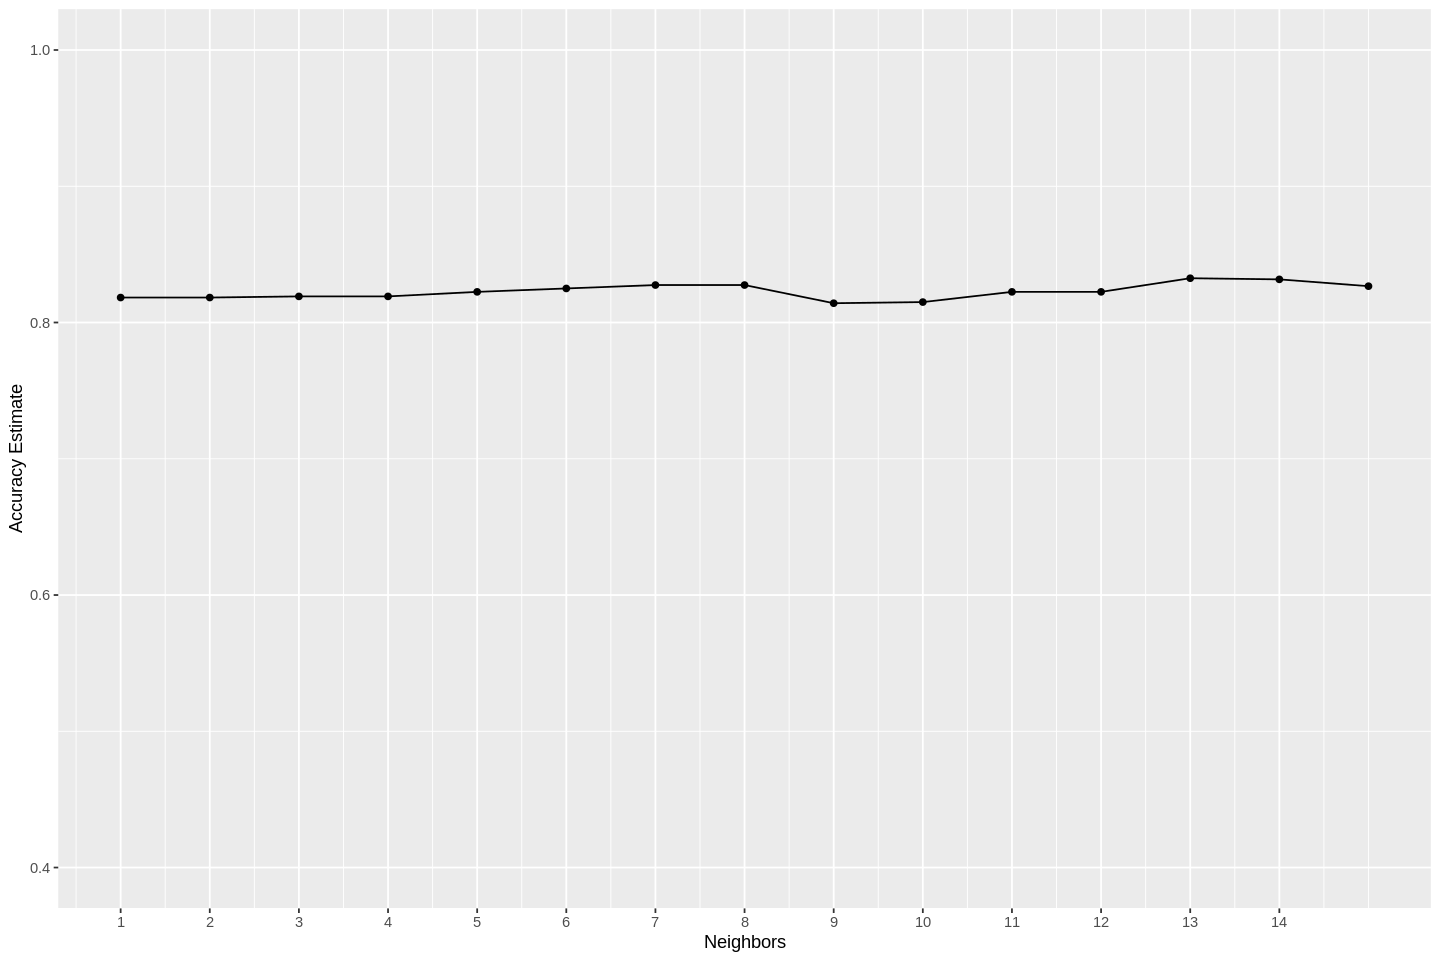

In [47]:
# tune to get the highest k
set.seed(1234)
recipe <- recipe(quality ~ . , data = red_wine_training)%>%
  step_center(all_predictors()) %>%
  step_scale(all_predictors())
vfold <- vfold_cv(red_wine_training, v = 10, strata = quality)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")
knn_results <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = vfold, grid = 20) %>%
      collect_metrics()
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot

In [48]:
set.seed(1234)
best_accuracy <-  accuracies %>% filter(mean == max(mean)) %>% slice(1)
best_accuracy
best_k <- best_accuracy %>% pull(neighbors)
best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
13,accuracy,multiclass,0.8325,10,0.007900813,Model13


[1] 13

In [49]:
#pick best K
set.seed(1234)
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) %>%
      set_engine("kknn") %>%
      set_mode("classification")
mnist_fit <- workflow() %>%
      add_recipe(recipe) %>%
      add_model(mnist_spec) %>%
      fit(data = red_wine_training)


In [50]:
set.seed(1234)
mnist_predictions <- predict(mnist_fit, red_wine_testing) %>%
                   bind_cols(red_wine_testing) 
mnist_predictions

mnist_metrics <- mnist_predictions %>%
        metrics(truth = quality, estimate = .pred_class) 
mnist_metrics

mnist_conf_mat <- mnist_predictions %>%
        conf_mat(truth = quality, estimate = .pred_class) 
mnist_conf_mat

.pred_class,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Satisfactory,7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,Satisfactory
Satisfactory,5.6,0.615,0.00,1.6,0.089,16,59,0.9943,3.58,0.52,9.9,Satisfactory
Satisfactory,8.9,0.620,0.18,3.8,0.176,52,145,0.9986,3.16,0.88,9.2,Satisfactory
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Satisfactory,6.8,0.67,0.15,1.8,0.118,13,20,0.99540,3.42,0.67,11.3,Satisfactory
Good,6.7,0.32,0.44,2.4,0.061,24,34,0.99484,3.29,0.80,11.6,Good
Satisfactory,6.0,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,Satisfactory


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8471178
kap,multiclass,0.3557702


              Truth
Prediction     Bad Good Satisfactory
  Bad            0    0            0
  Good           1   22           14
  Satisfactory  15   31          316

DISCUSSION

Using the cross-validation method, we found that the k-value of 13 computed a classifier with the highest accuracy, although accuracies of k-values were not significantly differnt than k = 1 as shown in the graph. We also found that our classifier was 84.7% accurate on the test data compared to 83.3% on the training data. It predicted 0 bad quality wines, 22 good quality wines and 316 statisfactory quality wines accurately, compared to predicting 16 bad quality wines, 31 good quality wines and 14 satisfactory quality wines inaccurately.

We expected our model to have a bit higher accuracy than 84.7% as we used 11 chemcial properties as predictors in our classifer and scaled and centered them so that each variable had an equal effect on the classifier by making each predictor's mean equal to 0 and standard deviation equal to 1. We also tuned our classifier by performing cross-validation to choose a k-value that would help us maximize accuracy along with other measures taken. 

Our model helped classify quality of red wine depending on 11 factors: fixed quality, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulfates and alcohol. a wine label can use the model we have created to see which qualities and their quantities lead to a wine of a good quality and use that information to change their wine production. The wine labels can modify their product by changing its chemical properties accordingly to increase their sales as well as receive positive feedback from wine critics and customers which could help the label establish itself as a reputable brand. 